In [20]:
import os
import pandas
import matplotlib.pyplot as plt

In [3]:
print(pandas.__version__)

1.0.1


In [4]:
X = pandas.read_excel("autos.xlsx",sheet_name=0,header=0,index_col=0)

In [5]:
print(X.shape)
n , p = X.shape

(18, 6)


In [6]:
X.head(20)

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


## Préparation des données

In [7]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.22.1


In [8]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [9]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [10]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))


[1. 1. 1. 1. 1. 1.]


In [11]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [12]:
#affichage des paramètres
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [13]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6

6


## Valeurs propres et scree plot

In [15]:
#variance expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [16]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [17]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [18]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


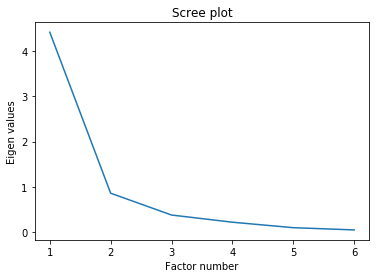

In [21]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

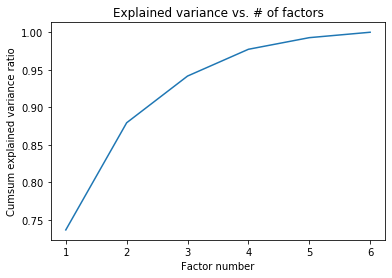

In [22]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## Détermination du nombre de facteur à retenir

In [23]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [24]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


## Représentation des individus – Outils pour l’interprétation
## Coordonnées factorielles

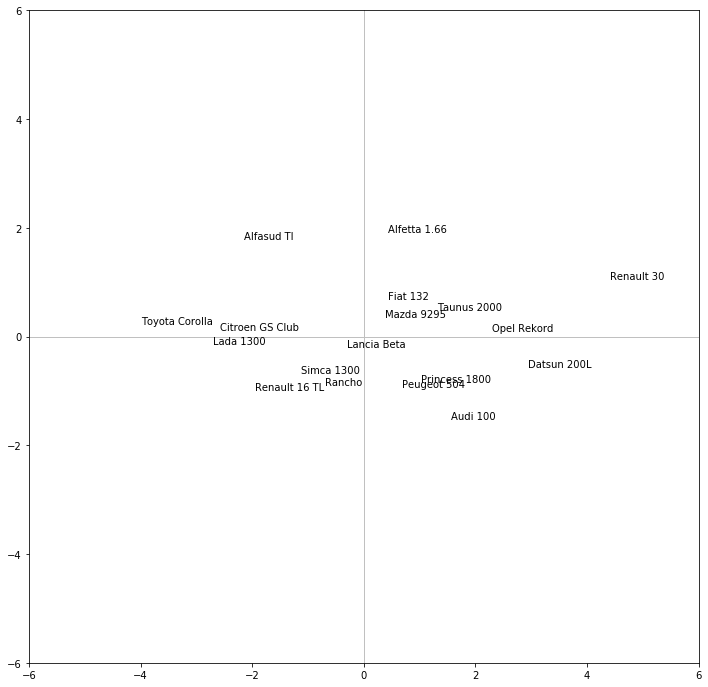

In [25]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


## Qualité de représentation – Les COS² (cosinus carré).

In [26]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))


ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta 1.66   4.456770
11    Princess 1800   1.952513
12      Datsun 200L  11.112624
13      Taunus 2000   2.452986
14           Rancho   1.963373
15       Mazda 9295   0.684521
16      Opel Rekord   6.083119
17        Lada 1300   7.922198


In [27]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta 1.66  0.042978  0.820652
11    Princess 1800  0.530947  0.362855
12      Datsun 200L  0.778390  0.028137
13      Taunus 2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda 9295  0.217336  0.185337
16      Opel Rekord  0.861900  0.001790
17        Lada 1300  0.926052  0.002607


In [28]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta 1.66  0.002407  0.237357
11    Princess 1800  0.013028  0.045978
12      Datsun 200L  0.108701  0.020292
13      Taunus 2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda 9295  0.001870  0.008233
16      Opel Rekord  0.065888  0.000707
17        Lada 1300  0.092194  0.001340


In [30]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


In [31]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [32]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [33]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V.MAX  0.754710  0.573519


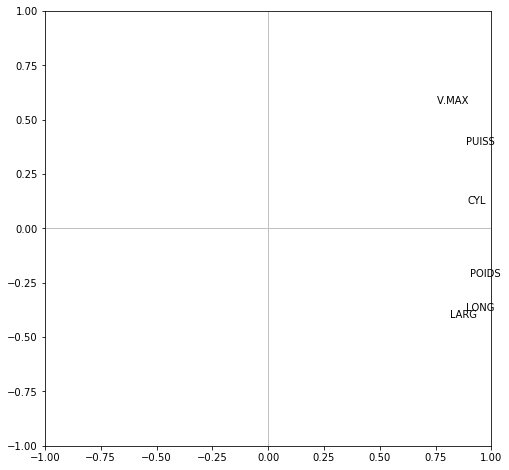

In [34]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

In [35]:
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [36]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V.MAX  0.569588  0.328925


## Contribution des variables aux axes (CTR)

In [37]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))


id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
4  POIDS  0.185341  0.058892
5  V.MAX  0.128841  0.384230
